# Import Libraries

In [23]:
import numpy as np
from scipy.stats import ttest_1samp
from scipy.stats import norm
import matplotlib.pyplot as plt

# Data

In [24]:
b_values = np.arange(-4, 4.1, 0.1)  # True mean deviation parameter
alpha = 0.05
T_list = [250, 500]              # Sample sizes
alpha = 0.05
N = 1000                          # Number of Monte Carlo simulations

# Theoretical Power Curve

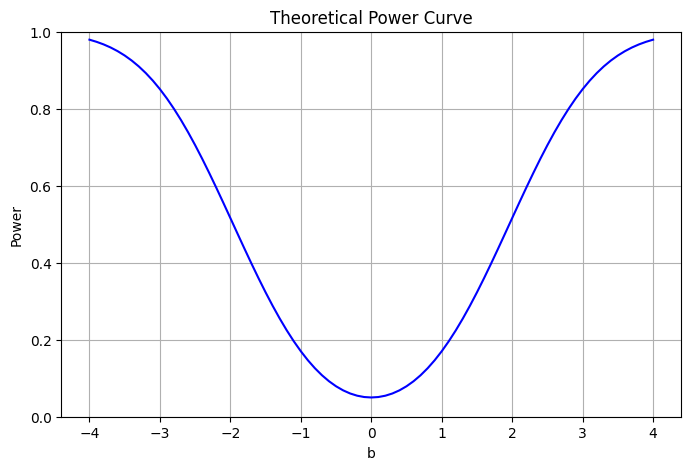

In [25]:
z_crit = norm.ppf(1 - alpha/2)       # Critical value for two-sided test

# Power is the probability of rejecting H0 when H1 is true:

# Compute theoretical power

# Step 1: Define H0 and H1
# H0: mu_r = 1 (null hypothesis)
# H1: mu_r = 1 + b/sqrt(T) (true mean under alternative)

# Step 2: Standardize the sample mean to create the Z statistic
# Z = (bar_r - 1) / (sigma / sqrt(T)), with sigma = 1
# Under H1, the expected value of Z is:
# E[Z] = (mu_r - 1) / (1/sqrt(T)) = (1 + b/sqrt(T) - 1) / (1/sqrt(T)) = b

# Step 3: Determine the critical values for a two-sided test at alpha=0.05
# The critical region is |Z| > z_crit, where z_crit = 1.96
# This comes from norm.ppf(1 - alpha/2)

# Step 4: Power is the probability that Z falls outside the critical region under H1
# Power = P(Z < -z_crit | H1 true) + P(Z > z_crit | H1 true)

# Step 5: Use the standard normal cumulative distribution function (CDF) to calculate probabilities
# P(Z < -z_crit) = norm.cdf(-z_crit - b) and P(Z > z_crit) = 1 - norm.cdf(z_crit - b)

power_theoretical = norm.cdf(-z_crit - b_values) + (1 - norm.cdf(z_crit - b_values))

# If b = 0, the true mean equals H0, so the "power" equals alpha (Type I error probability)

# Plot theoretical power curve
plt.figure(figsize=(8,5))
plt.plot(b_values, power_theoretical, color='blue')
plt.xlabel('b')
plt.ylabel('Power')
plt.title('Theoretical Power Curve')
plt.grid(True)
plt.ylim(0,1)
plt.show()

# Empirical Power Curve: MC


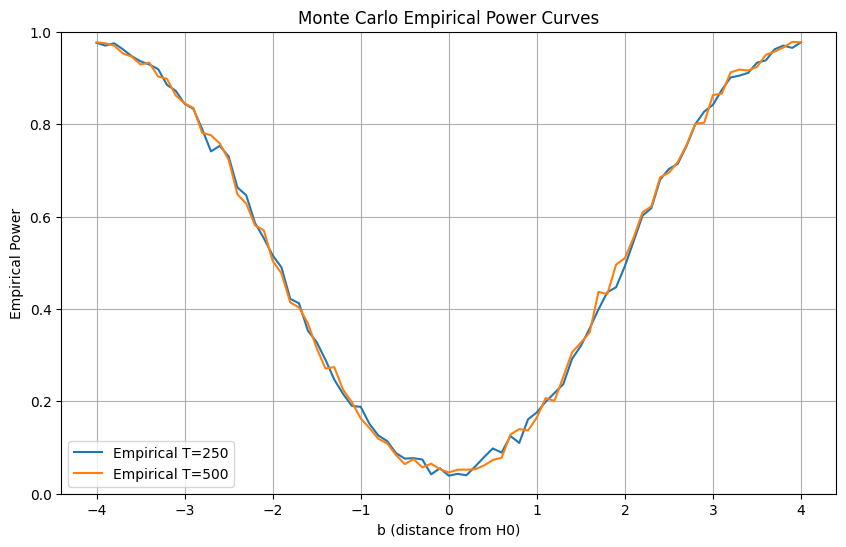

In [26]:
empirical_power = {}  # Dictionary to store Monte Carlo power curves for each sample size T

# Loop over each sample size T
for T in T_list:
    power_curve = []  # List to store power values for different b
    # Loop over each b value (distance from H0)
    for b in b_values:
        rejections = 0  # Counter for how many times we reject H0 in N simulations
        mu_r = 1 + b / np.sqrt(T)  # True mean under H1 for this b and sample size T

        # Monte Carlo simulation: generate N independent samples of size T
        for _ in range(N):
            # Generate one sample of size T from N(mu_r, 1)
            r = np.random.normal(loc=mu_r, scale=1, size=T)
            # Perform a two-sided t-test against H0: mean = 1
            t_stat, p_val = ttest_1samp(r, popmean=1)
            # Check if p-value is less than alpha (significance level)
            # If yes, we "reject H0" for this simulated sample
            if p_val < alpha:
                rejections += 1

        # Empirical power: proportion of N simulations where H0 was rejected
        power_curve.append(rejections / N)

    # Store the power curve for this sample size T
    empirical_power[T] = power_curve

# Plot the empirical power curves for all sample sizes
plt.figure(figsize=(10,6))
for T in T_list:
    plt.plot(b_values, empirical_power[T], label=f'Empirical T={T}')

# Add labels and title for clarity
plt.xlabel('b (distance from H0)')  # x-axis: how far the true mean is from H0
plt.ylabel('Empirical Power')       # y-axis: probability of correctly rejecting H0
plt.title('Monte Carlo Empirical Power Curves')
plt.grid(True)                       # Add grid for easier reading
plt.ylim(0,1)                        # Power is always between 0 and 1
plt.legend()                         # Show which line corresponds to which T
plt.show()

# Comparison

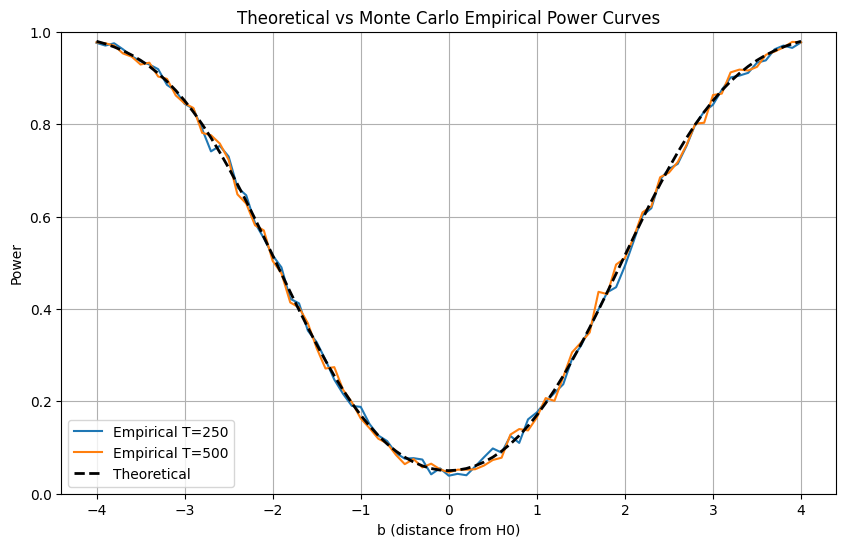

In [27]:
# Plot the empirical power curves for all sample sizes
plt.figure(figsize=(10,6))

# Plot Monte Carlo empirical curves
for T in T_list:
    plt.plot(b_values, empirical_power[T], label=f'Empirical T={T}', linestyle='-')

# Overlay the previously computed theoretical power
plt.plot(b_values, power_theoretical, label='Theoretical', color='black', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('b (distance from H0)')
plt.ylabel('Power')
plt.title('Theoretical vs Monte Carlo Empirical Power Curves')

# Add grid, limits, and legend
plt.grid(True)
plt.ylim(0,1)
plt.legend()

# Show the plot
plt.show()


Note: In this setup, the true mean under H1 is defined as mu_r = 1 + b/np.sqrt(T)

This means that for the same b, the deviation from H0 decreases as T increases.
As a result, the power for T=500 can sometimes be lower than T=250 for certain b values, causing the curves to intersect.

This is a particular case due to the scaling by sqrt(T) and is not a general behavior.